In [26]:
!pip install tensorflow

In [27]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D,  Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [40]:
train = pd.read_csv('C:/Users/ACER/Desktop/Digit/train.csv')
test = pd.read_csv('C:/Users/ACER/Desktop/Digit/test.csv')

In [41]:
test = np.array(test, dtype=np.float32)/255
test = test.reshape(-1,28,28,1)

In [31]:
x_train = train.drop(['label'], axis=1)
y_train = train['label']

In [32]:
y_train = keras.utils.to_categorical(y_train,num_classes=10)

In [33]:
x_train = np.array(x_train, dtype=np.float32)/255.0

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


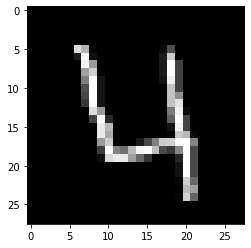

In [34]:
x_train = x_train.reshape(-1,28,28,1)
plt.imshow(x_train[3], cmap='gray')
print(y_train[3])

In [35]:
datagen = ImageDataGenerator(rotation_range=20,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  horizontal_flip=False)
generator  = datagen.flow(x_train,y_train,batch_size=128)

In [36]:
input_shape = (28,28,1)
input_layer = Input(input_shape)
layer = Conv2D(16,(3,3),activation = tf.nn.relu, input_shape = input_shape, padding='same')(input_layer)
layer = MaxPool2D((2,2))(layer)
layer = Conv2D(32,(3,3),activation = tf.nn.relu, padding='same')(layer)
layer = MaxPool2D((2,2))(layer)
layer = Conv2D(64,(3,3),activation = tf.nn.relu, padding='same')(layer)
layer = MaxPool2D((2,2))(layer)

flatten = Flatten()(layer)

layer = Dense(768,activation = tf.nn.relu)(flatten)
dropout = Dropout(0.2)(layer)
output_layer = Dense(10, activation = tf.nn.sigmoid)(dropout)
model = Model(input_layer,output_layer)

In [37]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0   

In [38]:
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=50, mode='min', restore_best_weights=True)

In [39]:
epoch = 60
model_hist = model.fit(generator,epochs=epoch, batch_size=128,callbacks=[early_stop],verbose=1)

Epoch 1/60
329/329 [==============================] - 21s 63ms/step - loss: 0.6889 - accuracy: 0.7703
Epoch 2/60
329/329 [==============================] - 21s 65ms/step - loss: 0.2130 - accuracy: 0.9340
Epoch 3/60
329/329 [==============================] - 22s 67ms/step - loss: 0.1533 - accuracy: 0.9533
Epoch 4/60
329/329 [==============================] - 23s 69ms/step - loss: 0.1153 - accuracy: 0.9647
Epoch 5/60
329/329 [==============================] - 22s 66ms/step - loss: 0.1008 - accuracy: 0.9688
Epoch 6/60
329/329 [==============================] - 21s 64ms/step - loss: 0.0879 - accuracy: 0.9720
Epoch 7/60
329/329 [==============================] - 22s 67ms/step - loss: 0.0800 - accuracy: 0.9752
Epoch 8/60
329/329 [==============================] - 24s 72ms/step - loss: 0.0674 - accuracy: 0.9794
Epoch 9/60
329/329 [==============================] - 25s 76ms/step - loss: 0.0680 - accuracy: 0.9774
Epoch 10/60
329/329 [==============================] - 22s 66ms/step - loss: 0.065

In [42]:
model.evaluate(x_train,y_train)

1313/1313 [==============================] - 6s 5ms/step - loss: 0.0109 - accuracy: 0.9962


[0.010878794826567173, 0.9962142705917358]

In [43]:
x = np.arange(1, epoch + 1)
train_acc = model_hist.history['accuracy']
train_loss = model_hist.history['loss']

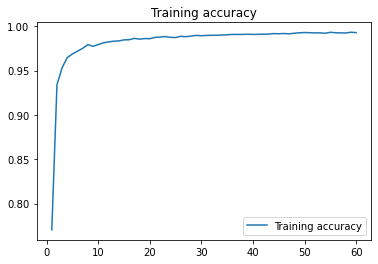

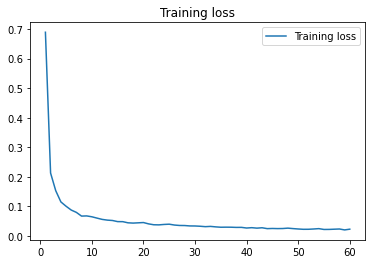

In [51]:
plt.plot(x , train_acc, label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.show()
plt.plot(x , train_loss, label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()


In [52]:
prediction = model.predict(test)

In [53]:
predict = np.array(np.round(prediction), dtype = np.int32)
predict = np.argmax(predict , axis=1).reshape(-1, 1)
out = [{'ImageId': i+1, 'Label': predict[i][0]} for i in range(len(predict))]
pd.DataFrame(out).to_csv('submission.csv', index=False)